# **Trabajo Practico Numero 1**

**Antes que nada**:</br> $para$ $los$ $ejercicios$ $seran$ $necesarias$ $las$ $librerias$ **numpy**, **scipy** $y$ **matplotlib**, </br>$por$ $lo$ $tanto$, $las$ $importamos$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

## Ejercicio 1

Dada una matriz A $\in\mathbb{R}^{n \times n}$, devuelve las dos matrices L y U de la descomposición A = LU.

In [2]:
def descompLU(A):
    '''
    Parametro: matriz A perteneciente a R^n*n.
    Retorna: Las dos matrices de descomposicion LU = A
    '''
    A = A.astype(np.float64)

    n = A.shape[0] 

    if not np.diag(A).all():
        print('Error: Hay por lo menos un cero en la diagonal')
        identidad = np.eye(n)
        return (identidad,A)

    if n == 1:
        L = 1
        U = A[0,0]
        return (L, U)

    U = np.zeros_like(A)
    U[0,:] = A[0,:]  # Primer fila de U es igual a primer fila de A

    L = np.eye(n)
    L[1:, 0] = A[1:,0] / U[0,0] #L_21

    matriz_recursiva = A[1:,1:] - L[1:, 0].reshape(n-1,1)@U[0,1:].reshape(1,n-1)

    L_22, U_22 = descompLU(matriz_recursiva)
    L[1:,1:] = L_22 
    U[1:,1:] = U_22 
    
    return (L,U)

In [3]:
# Ejemplo de uso
A = np.array([[4, 3, 2, 1],
              [2, 9, 7, 5],
              [4, 7, 7, 8],
              [6, 9, 8, 9]])


L, U = descompLU(A)
print("Matriz L:")
print(L)
print("\nMatriz U:")
print(U)

print("\nMatriz L*U:\n", np.dot(L,U))

Matriz L:
[[1.         0.         0.         0.        ]
 [0.5        1.         0.         0.        ]
 [1.         0.53333333 1.         0.        ]
 [1.5        0.6        0.77777778 1.        ]]

Matriz U:
[[4.         3.         2.         1.        ]
 [0.         7.5        6.         4.5       ]
 [0.         0.         1.8        4.6       ]
 [0.         0.         0.         1.22222222]]

Matriz L*U:
 [[4. 3. 2. 1.]
 [2. 9. 7. 5.]
 [4. 7. 7. 8.]
 [6. 9. 8. 9.]]


## Ejercicio 3

In [4]:
def resolverLU(A, b):
    '''
    Parametros:
        *matriz A n*n
        *vector b de n elementos
    Retorna:
        *x vector solucion de la ecuación Ax = b
    '''

    #Obtenemos L y U haciendo uso del ejercicio 1
    L, U = descompLU(A)

    #Resuelvo la ecuacion Ly = b especificada en la consigna
    y = sp.linalg.solve_triangular(L, b, lower=True)

    #Con (y) puedo obtener la solucion a la ecuación Ux = y
    x = sp.linalg.solve_triangular(U, y, lower=False)

    return x


In [5]:
# Ejemplo de uso
A = np.array([[4, 3, 2, 1],
              [2, 9, 7, 5],
              [4, 7, 7, 8],
              [6, 9, 8, 9]])

b = np.array([4,4,7,8])

x = resolverLU(A, b)
print(f'\nResultado:\n {A@x}')


Resultado:
 [4. 4. 7. 8.]


## Ejercicio 5

In [6]:
def inversa(A):
    L = descompLU(A)[0]
    U = descompLU(A)[1]
    #Matriz identidad del tamaño de A.
    I= np.eye(len(A))
    i=0
    #Creamos una matriz Ainversa de 0s del mismo tamaño que A.
    Ainversa = np.zeros((len(A),len(A[0])))
    #Cada fila de Ainversa es igual a Aei.
    while i < len(I):
        #Resolvemos Ly=ei
        y = sp.linalg.solve_triangular(L,I[i], lower=True)
        #Resolvemos Ux=y
        x = sp.linalg.solve_triangular(U,y, lower=False)
        Ainversa[i] = x
        i = i+1
    #Devuelve la trnaspuesta de Ainversa (para que Aei sea cada columna).
    return(np.transpose(Ainversa))
        


## Ejercicio 6

In [7]:
# Obtengo una matriz generada aleatoriamente
Al = np.random.rand(10,10)

# Obtengo la matriz inversa usando la funcion del Ej. 5
inv_Al = inversa(Al)

# Obtengo el producto entre ambas matrices obtenidas
producto = np.dot(inv_Al, Al)

# Calculo el error en norma Frobenius
diferencia = producto - np.eye(len(producto)) #Obtengo la matriz para calcularle la norma Frobenius

# Calculo el radicando: sumo los cuadrados de la diagonal de la matriz diferencia
radicando = 0
for i in range (len(diferencia)):
    radicando = radicando + diferencia[i,i]**2

# Finalmente obtengo la raiz del radicando, obteniendo así el error
error_frobenius = np.sqrt(radicando)

error_frobenius

4.010656666373001e-15

## Ejercicio 7

In [8]:
def errorRelativo (A,x,b):
    e = np.linalg.norm(A@x-b, ord=2)/np.linalg.norm(b, ord=2)
    return(np.log(e))

In [9]:
def generar_random(n, matrix=True):
    '''
    n: Numero entero
    matrix: Booleano, en caso de ser True la funcion devuelve una matriz de n*n
            con numeros aleatorios pertenecientes a [-1,1).
            En caso de ser False, la funcion devuelve un vector de n elementos,
            todos pertenecientes a [-1,1). Valor por defecto = True
    '''

    if matrix:
        # Genero matriz aleatoria de 200*200
        A_positiva = np.random.rand(n,n)
        # Matriz de tamaño nxn de números aleatorios en [-1,0)
        A_negativa = np.random.rand(n,n) - np.ones((n,n))
        # Matriz de tamaño nxn de números aleatorios en [-1,1)
        return A_positiva + A_negativa
        
    else:
        # Genero vector aleatorio
        x_positivo = np.random.rand(n)
        x_negativo = np.random.rand(n) - np.ones(n)
        return x_positivo + x_negativo

In [10]:
def error_matriz_i(i):
    '''
    Parametro: i: Numero entero 
    Retorna: Tupla conteniendo el error relativo de la solucion al sistema Ax = b (generado aleatoriamente)
             , al resolverlo de dos maneras distintas.
             Siendo A una matriz cuadrada en reales con i filas, y b un vector en reales con i elementos
            
    '''
    ln_error_relativo_x1 = 0
    ln_error_relativo_x2 = 0

    for n in range(10):

        A = generar_random(i)

        x = generar_random(i, matrix=False)

        # Defino b
        b = np.dot(A,x)

        # Calculo la solucion al sistema Ax = b usando la funcion del Ejercicio 3
        x1 = resolverLU(A,b)
        # Obtengo el error relativo
        ln_error_relativo_x1 = ln_error_relativo_x1 + errorRelativo(A,x1,b)

        # Calculo x2 = inv(A)b
        x2 = np.dot(inversa(A),b)
        # Obtengo el error relativo
        ln_error_relativo_x2 = ln_error_relativo_x2 + errorRelativo(A,x2,b)

    # Devuelvo una tupla conteniendo ambos errores relativos
    return (ln_error_relativo_x1,ln_error_relativo_x2)


In [11]:
def obtener_vectores():
    # Inicializo dos listas vacias para luego llenarlas con los elementos de los vectores finaless
    vector1, vector2 = [], []

    for i in range(10,201):
        # Obtengo la suma de los logaritmos de los errores relativos
        sumar1, sumar2 = error_matriz_i(i) 

        # Agrego los errores relativos en las listas correspondientes
        vector1.append(sumar1) 
        vector2.append(sumar2)

    # Creo los vectores con los elementos de las listas
    v1 = np.array(vector1)
    v2 = np.array(vector2)

    return (v1,v2)


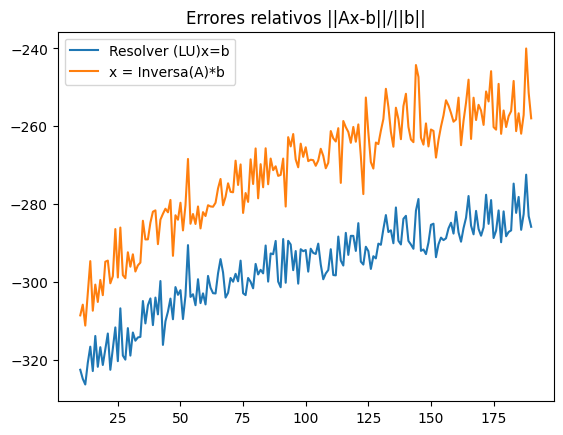

In [12]:
v1, v2 = obtener_vectores()

n = np.arange(10,len(v1))
plt.plot(n,v1[10:], label='Resolver (LU)x=b')
plt.plot(n,v2[10:], label='x = Inversa(A)*b')
plt.title('Errores relativos ||Ax-b||/||b||')
plt.legend()
plt.show()